## Data Set Information

In [1]:
with open("transfusion.names") as f:
    print(f.read())

Title: Blood Transfusion Service Center Data Set

Abstract: Data taken from the Blood Transfusion Service Center in Hsin-Chu City 
in Taiwan -- this is a classification problem.
	

-----------------------------------------------------

Data Set Characteristics: Multivariate
Number of Instances: 748
Area: Business
Attribute Characteristics: Real
Number of Attributes: 5
Date Donated: 2008-10-03
Associated Tasks: Classification
Missing Values? N/A

-----------------------------------------------------

Source:

Original Owner and Donor
Prof. I-Cheng Yeh
Department of Information Management
Chung-Hua University,
Hsin Chu, Taiwan 30067, R.O.C.
e-mail:icyeh 'at' chu.edu.tw
TEL:886-3-5186511

Date Donated: October 3, 2008 

-----------------------------------------------------

Data Set Information:

To demonstrate the RFMTC marketing model (a modified version of RFM), this study 
adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City 
in Taiwan. The center passes the

### Task1 : Retrieving and Preparing the Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import os

In [3]:
btsc = pd.read_csv("transfusion.data")

In [4]:
print(f'There are {btsc.shape[0]} rows and {btsc.shape[1]} columns')

There are 748 rows and 5 columns


In [5]:
#Show the column names
cl = btsc.columns.tolist()
print (cl)

['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)', 'Time (months)', 'whether he/she donated blood in March 2007']


In [6]:
print(f'Check data types')
btsc.dtypes

Check data types


Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [7]:
print(f'Information about the data: ')
btsc.info()

Information about the data: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [8]:
print(f"Check the null values: ")
btsc.isnull().sum()

Check the null values: 


Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [9]:
#First 10
btsc.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [10]:
btsc.describe().round(3)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000,748.000,748.000,748.000,748.000
mean,9.507,5.515,1378.676,34.282,0.238
std,8.095,5.839,1459.827,24.377,0.426
min,0.000,1.000,250.000,2.000,0.000
25%,2.750,2.000,500.000,16.000,0.000
50%,7.000,4.000,1000.000,28.000,0.000
75%,14.000,7.000,1750.000,50.000,0.000
max,74.000,50.000,12500.000,98.000,1.000


In [11]:
#For more convinient to see,change the last column's values 0,1 to False and True.
#btsc['whether he/she donated blood in March 2007'].replace({0: False, 1: True}, inplace=True)

In [12]:
#Check the datatype again
%rerun 6

=== Executing: ===
print(f'Check data types')
btsc.dtypes
=== Output: ===
Check data types


Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [13]:
#Check the value counts
btsc['whether he/she donated blood in March 2007'].value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [14]:
btsc['Recency (months)'].value_counts()

2     173
4     156
11     84
14     76
16     63
23     50
21     44
9      20
3      13
1       9
7       8
5       6
12      6
8       6
0       5
6       5
13      5
10      3
15      2
18      2
38      2
72      1
17      1
20      1
22      1
25      1
26      1
35      1
39      1
40      1
74      1
Name: Recency (months), dtype: int64

In [15]:
btsc['Frequency (times)'].value_counts()

1     158
2     112
3      87
4      62
5      62
6      52
7      43
8      31
9      24
11     22
10     14
12     14
16     13
14     13
13      9
15      6
17      4
24      3
19      2
20      2
21      2
22      2
46      1
18      1
23      1
26      1
33      1
34      1
38      1
41      1
43      1
44      1
50      1
Name: Frequency (times), dtype: int64

In [16]:
btsc['Time (months)'].value_counts()

4     57
16    51
14    44
2     36
23    36
      ..
13     1
12     1
65     1
36     1
3      1
Name: Time (months), Length: 78, dtype: int64

In [17]:
time_1 = btsc.sort_values(by=['Time (months)'],ascending=True).head(15)

In [18]:
time_1

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
47,2,2,500,2,0
580,2,1,250,2,0
153,2,1,250,2,1
155,2,1,250,2,0
156,2,1,250,2,0
157,2,1,250,2,0
158,2,1,250,2,0
159,2,1,250,2,0
160,2,1,250,2,0
161,2,1,250,2,0


In [19]:
time_2 = btsc.sort_values(by=['Time (months)'],ascending=False).head(15)

In [20]:
time_2

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
241,11,22,5500,98,0
505,2,41,10250,98,1
517,4,33,8250,98,1
562,4,16,4000,98,1
341,23,38,9500,98,0
327,14,16,4000,98,0
9,5,46,11500,98,1
503,2,44,11000,98,0
137,2,12,3000,98,0


We will split time(months) data in 3 levels 

time < 32 will be short

time > 64 and < 32 will be average

time >64 will be long

In [21]:
Time_Rate = ['long','short']
condition = [(btsc['Time (months)'] > 64),
            (btsc['Time (months)'] < 32)]
btsc['Time_Rate'] = np.select(condition, Time_Rate, default='average')
btsc.Time_Rate.value_counts()

short      402
average    247
long        99
Name: Time_Rate, dtype: int64

In [22]:
btsc['Monetary (c.c. blood)'].value_counts()

250      158
500      112
750       87
1000      62
1250      62
1500      52
1750      43
2000      31
2250      24
2750      22
2500      14
3000      14
4000      13
3500      13
3250       9
3750       6
4250       4
6000       3
4750       2
5250       2
5500       2
5000       2
8250       1
12500      1
9500       1
11500      1
5750       1
8500       1
6500       1
4500       1
11000      1
10750      1
10250      1
Name: Monetary (c.c. blood), dtype: int64

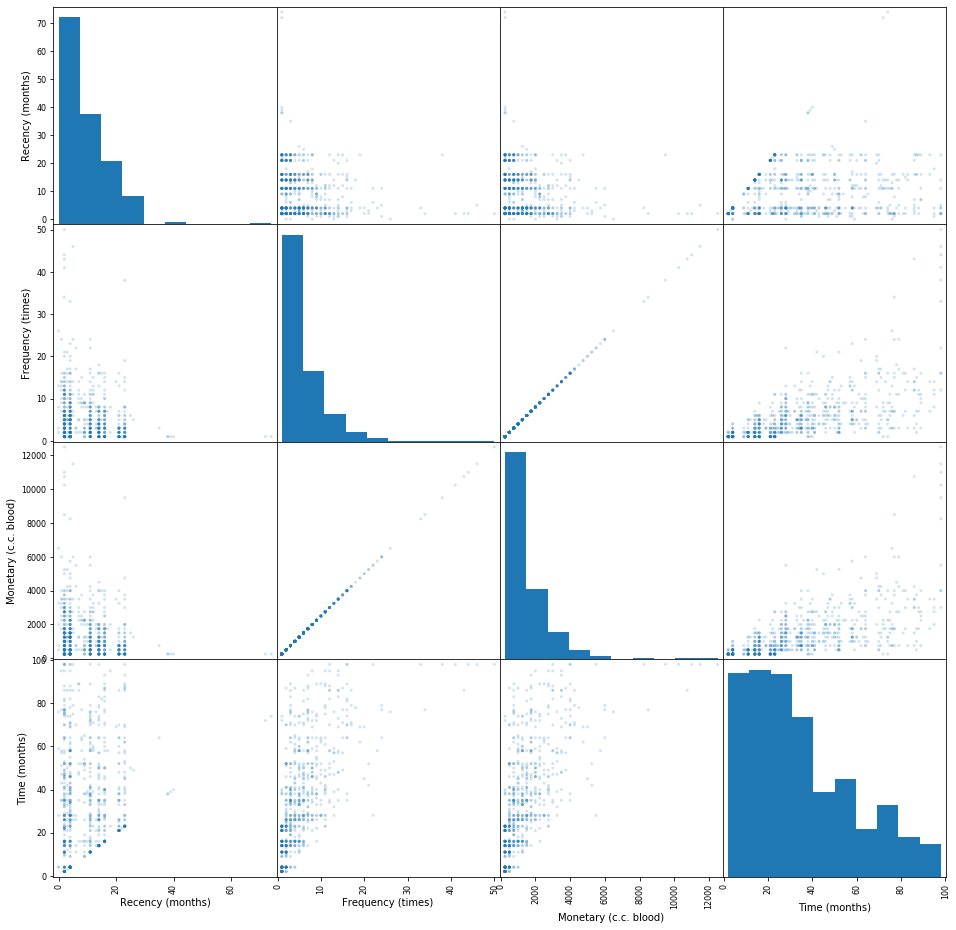

In [23]:
#Numeric variables relationship
scatter_1 = btsc[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']]
scatter_matrix(scatter_1, alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()

### Task 2: Data Exploration

#### Explore each column

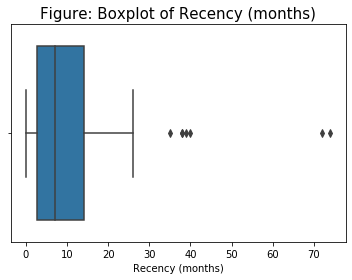

In [24]:
sns.boxplot(btsc['Recency (months)']).set_title('Figure: Boxplot of Recency (months)', fontsize = 15)
plt.show();


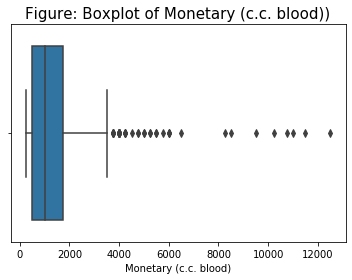

In [25]:
sns.boxplot(btsc['Monetary (c.c. blood)']).set_title('Figure: Boxplot of Monetary (c.c. blood))', fontsize = 15)
plt.show();

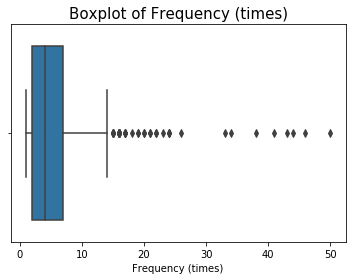

In [26]:
sns.boxplot(btsc['Frequency (times)']).set_title('Boxplot of Frequency (times)', fontsize = 15)
plt.show();

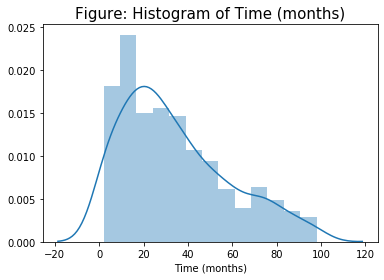

In [27]:
sns.distplot(btsc['Time (months)'], kde = True).set_title('Figure: Histogram of Time (months)', fontsize = 15)
plt.show();

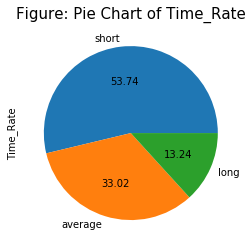

In [28]:
btsc['Time_Rate'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('Figure: Pie Chart of Time_Rate', fontsize = 15)
plt.show();

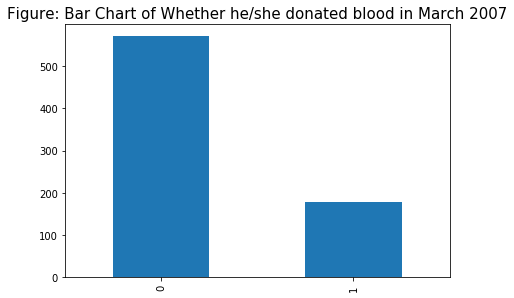

In [29]:
ax = btsc['whether he/she donated blood in March 2007'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure: Bar Chart of Whether he/she donated blood in March 2007', fontsize = 15)
plt.show();

#### Explore the relationship between all pairs of attributes

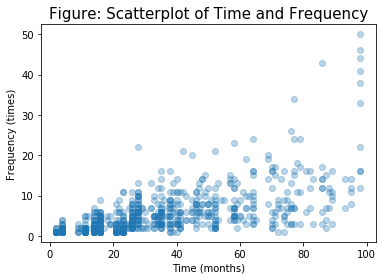

In [30]:
plt.scatter(btsc['Time (months)'],btsc['Frequency (times)'], alpha = 0.3)
plt.title('Figure: Scatterplot of Time and Frequency', fontsize = 15)
plt.xlabel('Time (months)')
plt.ylabel('Frequency (times)')
plt.show();

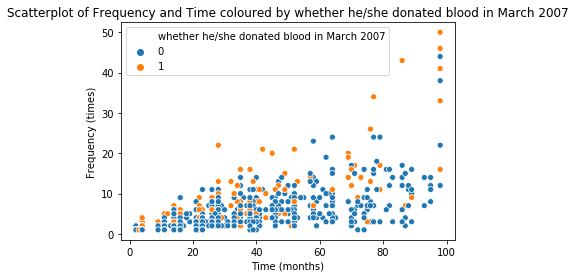

<Figure size 7200x7200 with 0 Axes>

In [31]:
sns.scatterplot(btsc['Time (months)'], btsc['Frequency (times)'], hue = btsc['whether he/she donated blood in March 2007'])
plt.title('Scatterplot of Frequency and Time coloured by whether he/she donated blood in March 2007', fontsize = 12);
plt.legend(loc = 'upper left')                                                                                     
plt.figure(figsize=(100,100))
plt.show();

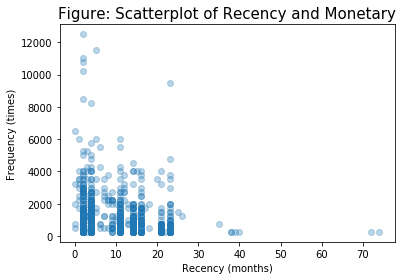

In [32]:
plt.scatter(btsc['Recency (months)'],btsc['Monetary (c.c. blood)'], alpha = 0.3)
plt.title('Figure: Scatterplot of Recency and Monetary', fontsize = 15)
plt.xlabel('Recency (months)')
plt.ylabel('Frequency (times)')
plt.show();

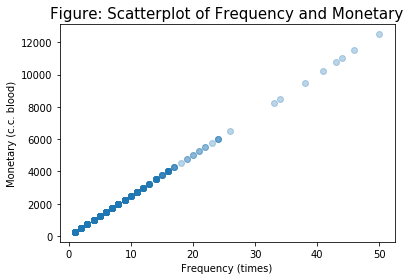

In [33]:
plt.scatter(btsc['Frequency (times)'],btsc['Monetary (c.c. blood)'], alpha = 0.3)
plt.title('Figure: Scatterplot of Frequency and Monetary', fontsize = 15)
plt.xlabel('Frequency (times)')
plt.ylabel('Monetary (c.c. blood)')
plt.show();

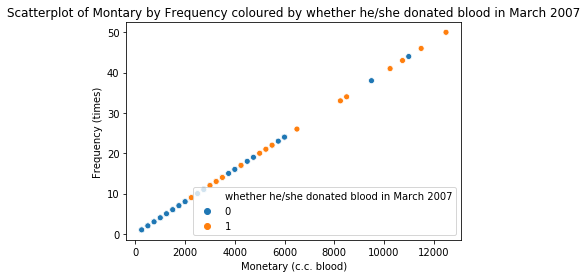

<Figure size 7200x7200 with 0 Axes>

In [34]:
sns.scatterplot(btsc['Monetary (c.c. blood)'], btsc['Frequency (times)'], hue = btsc['whether he/she donated blood in March 2007'])
plt.title('Scatterplot of Montary by Frequency coloured by whether he/she donated blood in March 2007', fontsize = 12);
plt.legend(loc = 'lower right')                                                                                     
plt.figure(figsize=(100,100))
plt.show();

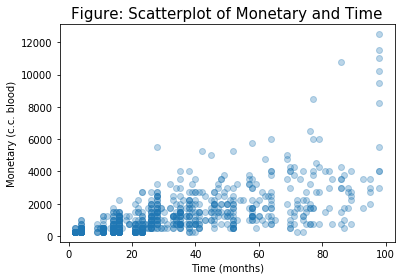

In [35]:
plt.scatter(btsc['Time (months)'],btsc['Monetary (c.c. blood)'], alpha = 0.3)
plt.title('Figure: Scatterplot of Monetary and Time', fontsize = 15)
plt.xlabel('Time (months)')
plt.ylabel('Monetary (c.c. blood)')
plt.show();

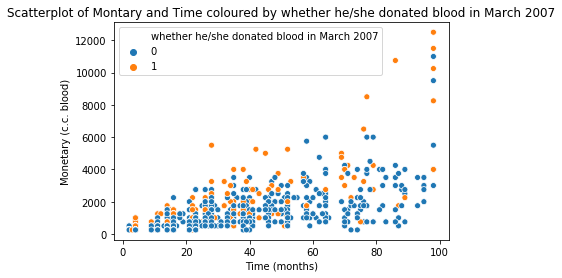

<Figure size 7200x7200 with 0 Axes>

In [36]:
sns.scatterplot(btsc['Time (months)'], btsc['Monetary (c.c. blood)'], hue = btsc['whether he/she donated blood in March 2007'])
plt.title('Scatterplot of Montary and Time coloured by whether he/she donated blood in March 2007', fontsize = 12);
plt.legend(loc = 'upper left')
plt.figure(figsize=(100,100))
plt.show();

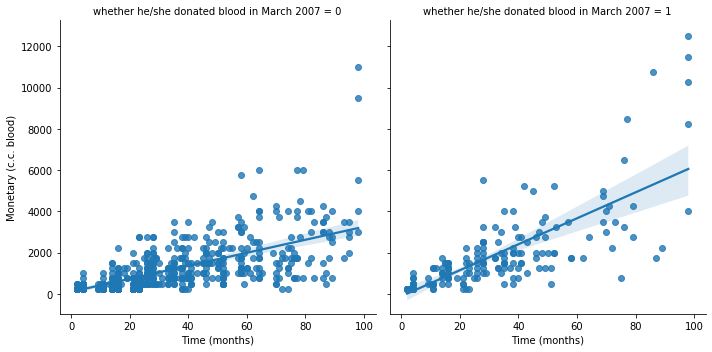

In [37]:
#Another plot for Time and Monetary
sns.lmplot(x = "Time (months)", y = "Monetary (c.c. blood)", col = "whether he/she donated blood in March 2007", data = btsc)
plt.show();

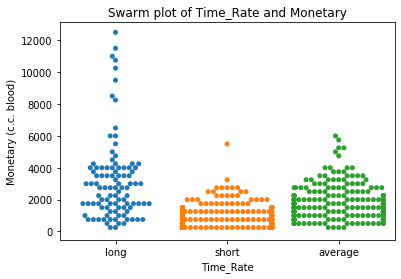

In [38]:
#Swarmplot for Time_Rate and Monetary
sns.swarmplot(x = "Time_Rate", y="Monetary (c.c. blood)", data = btsc)
plt.title("Swarm plot of Time_Rate and Monetary")
plt.show();

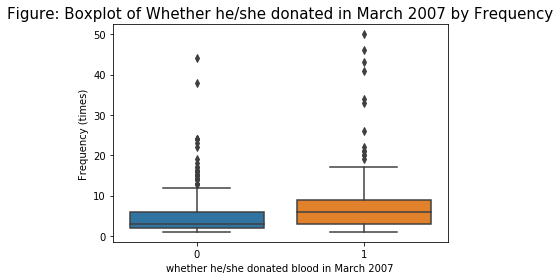

In [39]:
#Relathionshipss between target variable and others
sns.boxplot(btsc['whether he/she donated blood in March 2007'], btsc['Frequency (times)']);
plt.title('Figure: Boxplot of Whether he/she donated in March 2007 by Frequency', fontsize = 15)
plt.show();

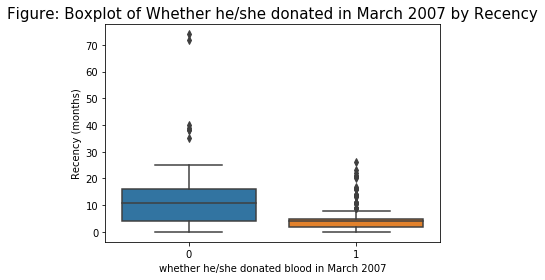

In [40]:
sns.boxplot(btsc['whether he/she donated blood in March 2007'], btsc['Recency (months)']);
plt.title('Figure: Boxplot of Whether he/she donated in March 2007 by Recency', fontsize = 15)
plt.show();

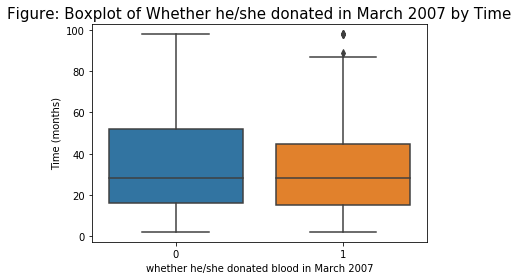

In [41]:
sns.boxplot(btsc['whether he/she donated blood in March 2007'], btsc['Time (months)']);
plt.title('Figure: Boxplot of Whether he/she donated in March 2007 by Time', fontsize = 15)
plt.show();

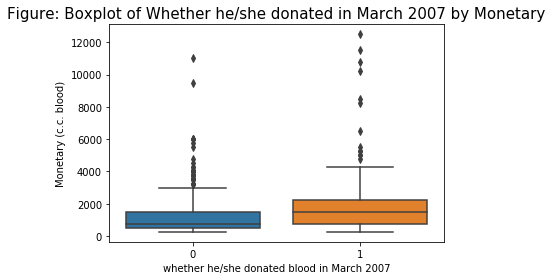

In [42]:
sns.boxplot(btsc['whether he/she donated blood in March 2007'], btsc['Monetary (c.c. blood)']);
plt.title('Figure: Boxplot of Whether he/she donated in March 2007 by Monetary', fontsize = 15)
plt.show();

## Task 3: Data Modelling

In [43]:
class_btsc = btsc[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']]

In [44]:
#Test size 0.331 will be the same size as the UCI repository
X_train, X_test, y_train, y_test = train_test_split(class_btsc, 
                                                    btsc['whether he/she donated blood in March 2007'], 
                                                    test_size=0.331,random_state=5)

In [45]:
X_train

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
503,2,44,11000,98
625,7,5,1250,35
454,21,1,250,21
194,2,2,500,14
432,16,7,1750,87
...,...,...,...,...
73,2,2,500,4
400,18,2,500,23
118,1,7,1750,57
701,16,1,250,16


In [46]:
X_test

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
709,21,6,1500,48
704,16,1,250,16
12,2,10,2500,28
541,2,10,2500,52
163,2,1,250,2
...,...,...,...,...
724,21,1,250,21
565,2,9,2250,75
159,2,1,250,2
107,3,5,1250,26


In [47]:
y_train

503    0
625    0
454    0
194    0
432    1
      ..
73     0
400    0
118    0
701    0
206    0
Name: whether he/she donated blood in March 2007, Length: 500, dtype: int64

In [48]:
y_test

709    0
704    0
12     1
541    0
163    1
      ..
724    0
565    0
159    0
107    0
293    0
Name: whether he/she donated blood in March 2007, Length: 248, dtype: int64

In [49]:
print (X_train.shape)
print (y_train.shape)

(500, 4)
(500,)


In [50]:
clf = KNeighborsClassifier(2)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)

In [51]:
print (cm)

[[182   8]
 [ 51   7]]


In [52]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       190
           1       0.47      0.12      0.19        58

    accuracy                           0.76       248
   macro avg       0.62      0.54      0.53       248
weighted avg       0.71      0.76      0.70       248



In [53]:
#Minkowski
clf = KNeighborsClassifier(2,p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm2p = confusion_matrix(y_test, y_pre)

In [54]:
print (cm2p)

[[182   8]
 [ 49   9]]


In [55]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.79      0.96      0.86       190
           1       0.53      0.16      0.24        58

    accuracy                           0.77       248
   macro avg       0.66      0.56      0.55       248
weighted avg       0.73      0.77      0.72       248



In [56]:
clf = KNeighborsClassifier(2,weights='distance',p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm2dp = confusion_matrix(y_test, y_pre)

In [57]:
print (cm2dp)

[[164  26]
 [ 39  19]]


In [58]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       190
           1       0.42      0.33      0.37        58

    accuracy                           0.74       248
   macro avg       0.62      0.60      0.60       248
weighted avg       0.72      0.74      0.73       248



In [59]:
#K = 5
clf = KNeighborsClassifier(5)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm5 = confusion_matrix(y_test, y_pre)

In [60]:
print (cm5)

[[165  25]
 [ 40  18]]


In [61]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84       190
           1       0.42      0.31      0.36        58

    accuracy                           0.74       248
   macro avg       0.61      0.59      0.60       248
weighted avg       0.71      0.74      0.72       248



In [62]:
clf = KNeighborsClassifier(5, p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm5p = confusion_matrix(y_test, y_pre)

In [63]:
print(cm5p)

[[166  24]
 [ 38  20]]


In [64]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       190
           1       0.45      0.34      0.39        58

    accuracy                           0.75       248
   macro avg       0.63      0.61      0.62       248
weighted avg       0.73      0.75      0.74       248



In [65]:
clf = KNeighborsClassifier(5,weights='distance',p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm5dp = confusion_matrix(y_test, y_pre)
print(cm5dp)

[[162  28]
 [ 39  19]]


In [66]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       190
           1       0.40      0.33      0.36        58

    accuracy                           0.73       248
   macro avg       0.61      0.59      0.60       248
weighted avg       0.71      0.73      0.72       248



In [67]:
#K = 8
clf = KNeighborsClassifier(8)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm8 = confusion_matrix(y_test, y_pre)

In [68]:
print(cm8)

[[186   4]
 [ 49   9]]


In [69]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.79      0.98      0.88       190
           1       0.69      0.16      0.25        58

    accuracy                           0.79       248
   macro avg       0.74      0.57      0.56       248
weighted avg       0.77      0.79      0.73       248



In [70]:
clf = KNeighborsClassifier(8,p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm8p = confusion_matrix(y_test, y_pre)

In [71]:
print(cm8p)

[[185   5]
 [ 50   8]]


In [72]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87       190
           1       0.62      0.14      0.23        58

    accuracy                           0.78       248
   macro avg       0.70      0.56      0.55       248
weighted avg       0.75      0.78      0.72       248



In [73]:
clf = KNeighborsClassifier(8,weights='distance', p=1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm8dp = confusion_matrix(y_test, y_pre)

In [74]:
print (cm8dp)

[[172  18]
 [ 45  13]]


In [75]:
print (classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       190
           1       0.42      0.22      0.29        58

    accuracy                           0.75       248
   macro avg       0.61      0.56      0.57       248
weighted avg       0.71      0.75      0.72       248



In [76]:
#Decision Tree
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
print(y_pre)

[0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0]


In [77]:
y_pre.shape

(248,)

In [78]:
dt_btsc = btsc[['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)','whether he/she donated blood in March 2007']]

y = dt_btsc.pop('whether he/she donated blood in March 2007')
X = dt_btsc

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.331, random_state = 5)

In [79]:
print (X_train.shape)
print (y_train.shape)

(500, 4)
(500,)


In [80]:
clf = DecisionTreeClassifier()
fit = clf.fit(X_train, y_train)

y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)


print (cm)
print (classification_report(y_test, y_pre))

[[160  30]
 [ 35  23]]
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       190
           1       0.43      0.40      0.41        58

    accuracy                           0.74       248
   macro avg       0.63      0.62      0.62       248
weighted avg       0.73      0.74      0.73       248



In [81]:
#For browsing .dot file, we need follow the instruction in tute7 by using gvedit. 
with open("class_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f,
                             feature_names=['Recency (months)','Frequency (times)',
                                            'Monetary (c.c. blood)','Time (months)'], class_names="whether he/she donated blood in March 2007",
                             filled=True, rounded=True, special_characters=True)